In [61]:
# linear and polynomial models with ridge regularization
# hyperparameter tuning (cross-validation) -> model training (feature importance) -> performance evaluation (mse, mae, training time)

from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import time
import matplotlib.pyplot as plt

train_set_x = pd.read_csv('../data/train_set_x_reduced.csv')
train_set_y = pd.read_csv('../data/train_set_y.csv')
test_set_x = pd.read_csv('../data/test_set_x_reduced.csv')
test_set_y = pd.read_csv('../data/test_set_y.csv')
pca_components = pd.read_csv('../data/pca_components.csv')

Hyperparameter tuning: {'alpha': 9.636627605010293}
Feature importance: [(287476.978174625, '5'), (178773.24501844752, '2'), (91263.54095276204, '10'), (72674.15442679562, '8'), (71577.82281285913, '6'), (24343.31431779925, '3'), (5757.322252190496, '4'), (254.4404315003506, '0'), (-1970.0015062402933, '12'), (-3825.45722215156, '11'), (-4977.925749845606, '1'), (-14784.620700785836, '7'), (-56722.86236358157, '9'), (-75658.36523997044, '13')]


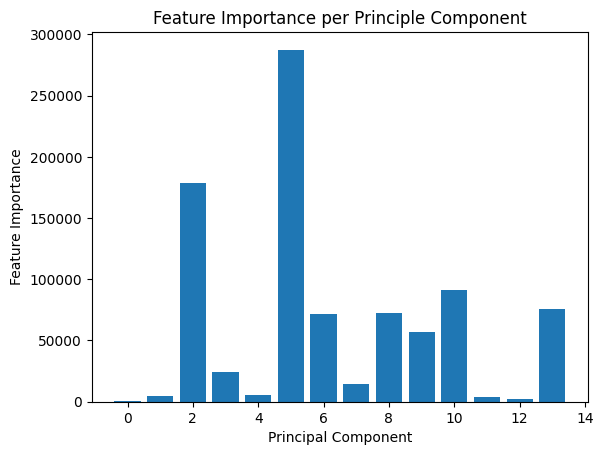

Train set MAE: 281108.9781653139
Train set MSE: 173749685723.47284
Test set MAE: 279745.92216516356
Test set MSE: 171712457800.1392
Training time: 0.2865110000129789


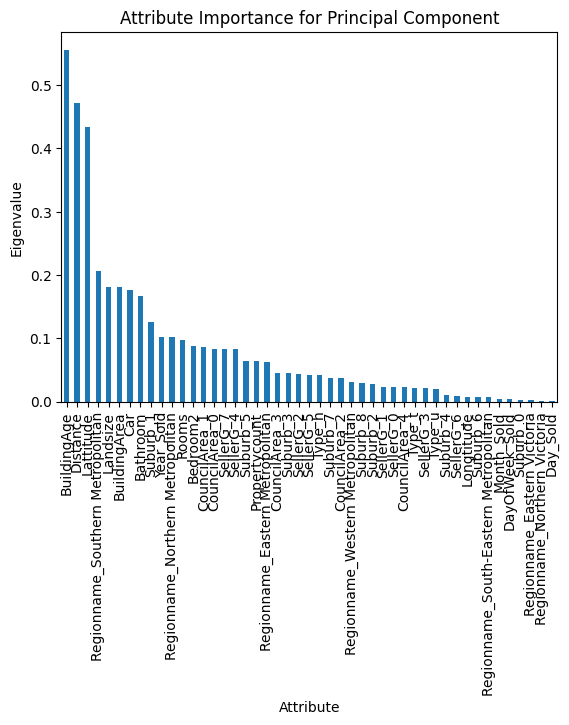

In [55]:
# linear ridge model
linear_ridge_model = Ridge()

#hyperparameter tuning using 10-fold cross validation
params = dict(alpha=uniform(loc=0, scale=10))
clf = RandomizedSearchCV(linear_ridge_model, params, random_state=0)
start = time.perf_counter()
search = clf.fit(train_set_x, train_set_y)
end = time.perf_counter()
print('Hyperparameter tuning:',search.best_params_)

#feature importance
feature_importance = search.best_estimator_.coef_.flatten()
attributes = list(train_set_x.columns)
print('Feature importance:',sorted(zip(feature_importance, attributes), reverse=True))
pca_list = list(range(0,14))
fig = plt.figure()
plt.bar(pca_list, abs(feature_importance))
plt.xlabel('Principal Component')
plt.ylabel('Feature Importance')
plt.title('Feature Importance per Principle Component')
plt.show()
#pca 5 is the most important
pca = pca_components.iloc[5]
pca.abs().sort_values(ascending=False).plot(kind='bar',ylabel='Eigenvalue',xlabel='Attribute',title='Attribute Importance for Principal Component')

#performance evaluation
linear_ridge_train_y_predicted = search.best_estimator_.predict(train_set_x)
print('Train set MAE:',mean_absolute_error(linear_ridge_train_y_predicted, train_set_y))
print('Train set MSE:',mean_squared_error(linear_ridge_train_y_predicted, train_set_y))
linear_ridge_test_y_predicted = search.best_estimator_.predict(test_set_x)
print('Test set MAE:',mean_absolute_error(linear_ridge_test_y_predicted, test_set_y))
print('Test set MSE:',mean_squared_error(linear_ridge_test_y_predicted, test_set_y))
print('Training time:',end-start)

In [72]:
#polynomial ridge model
poly_ridge_model = Pipeline([
    ('polynomial',PolynomialFeatures()),
    ('ridge',Ridge())
])

#hyperparameter tuning using 10-fold cross validation
params = [{
    'polynomial__degree': list(range(1,5)),
    'polynomial__interaction_only': [True,False],
    'ridge__alpha': uniform(loc=0, scale=10)
}]
clf = RandomizedSearchCV(polynomial_ridge_model, params, random_state=0)
start = time.perf_counter()
search = clf.fit(train_set_x, train_set_y)
end = time.perf_counter()
print('Hyperparameter tuning:',search.best_params_)

Hyperparameter tuning: {'polynomial__degree': 2, 'polynomial__interaction_only': False, 'ridge__alpha': 6.458941130666561}


Feature importance: [(204603.4254655255, '8'), (180843.6448245516, '5'), (172966.62224531145, '2'), (79023.8131608099, '5 10'), (61804.30436646169, '6'), (53920.80504614266, '4 13'), (48578.06200831142, '2 8'), (48303.665433142945, '8 10'), (46675.88660999678, '6 9'), (43279.250765031415, '6 8'), (39426.11968185177, '4'), (34453.94402288597, '9 13'), (32942.456163120325, '9 10'), (32362.217891646647, '3'), (32208.514587986658, '5 6'), (31266.34636714293, '5^2'), (26524.04494678394, '2 5'), (26087.365657350674, '5 8'), (23464.32939469652, '4 7'), (19446.242643639547, '7 9'), (19224.20445769215, '7'), (19080.48481118356, '4 9'), (18715.427682642145, '7 8'), (17392.146153493602, '3 12'), (16144.038667210501, '4 11'), (14181.936791704848, '2 12'), (14002.242357358115, '13^2'), (12093.362081880086, '9 12'), (10693.92164475558, '11^2'), (10202.558062026364, '10 12'), (9345.553865383357, '6 13'), (9039.958999299799, '12^2'), (8650.201694655912, '11 12'), (8397.67274572949, '2 10'), (6152.4043

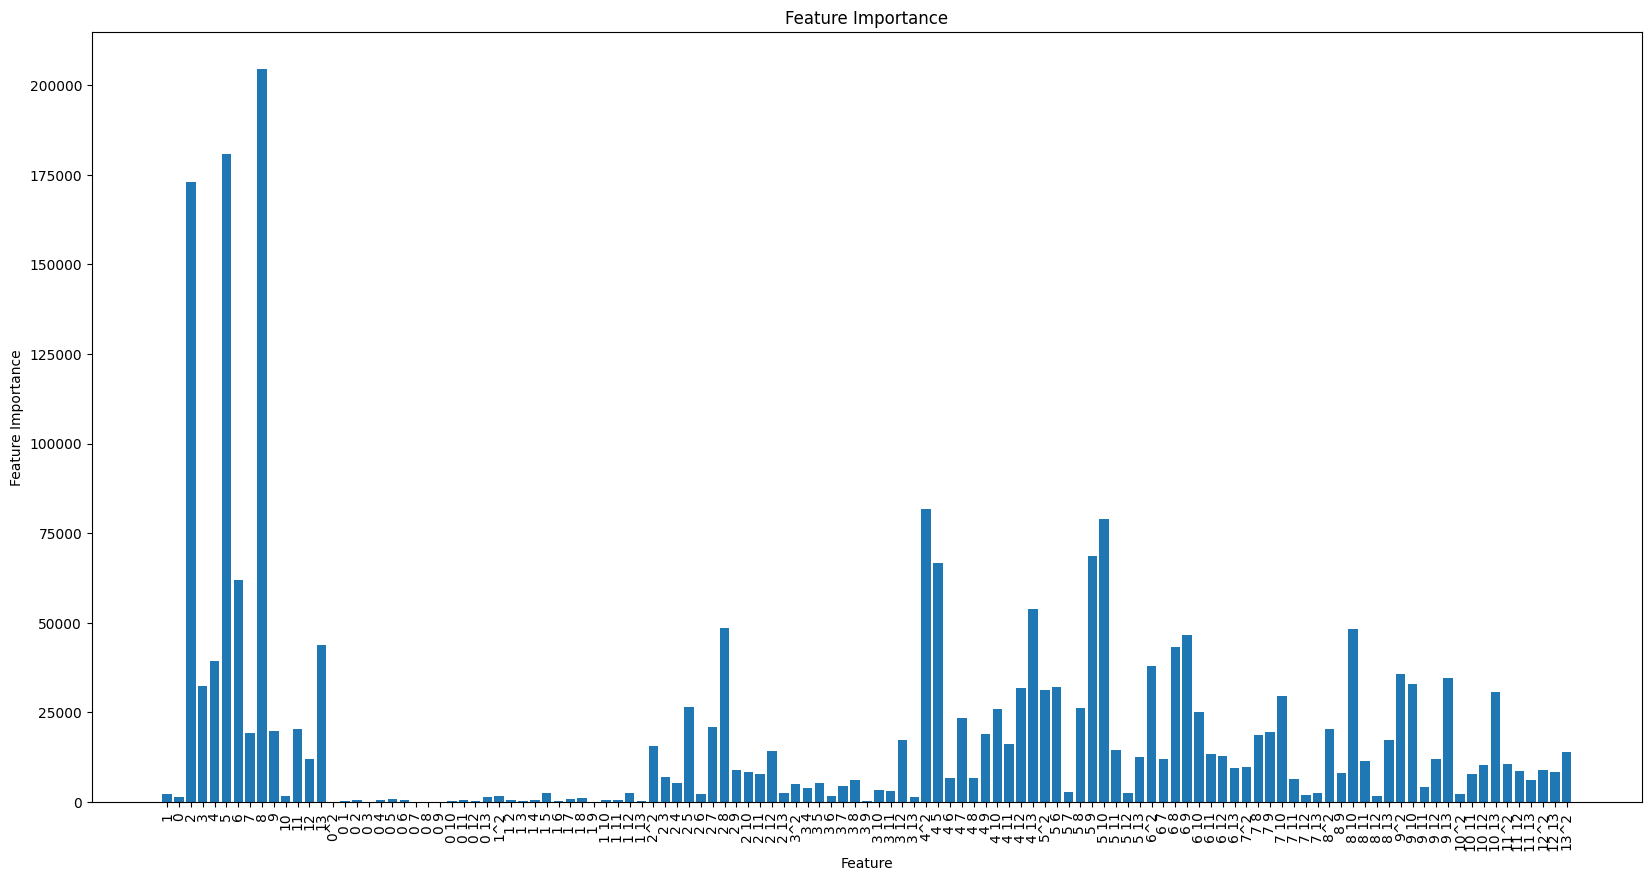

<Axes: title={'center': 'Attribute Importance for Principal Component'}, xlabel='Attribute', ylabel='Eigenvalue'>

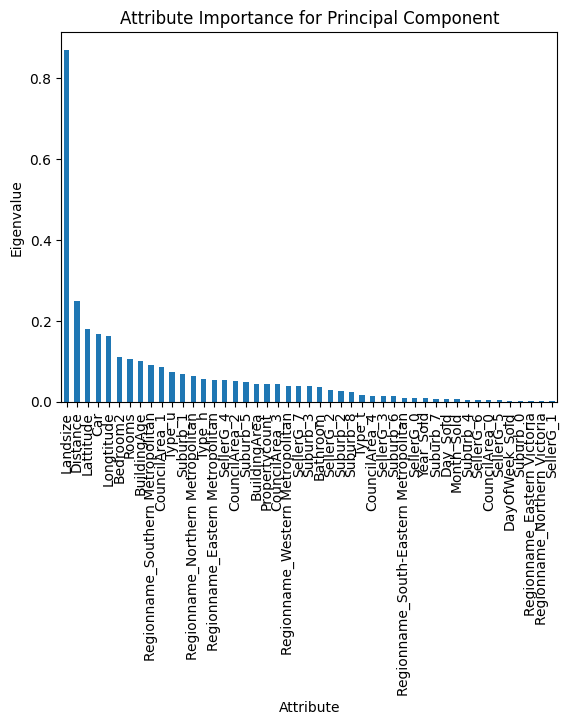

In [83]:
#feature importance
feature_importance = search.best_estimator_.named_steps['ridge'].coef_.flatten()
attributes = search.best_estimator_.named_steps['polynomial'].get_feature_names_out()
print('Feature importance:',sorted(zip(feature_importance, attributes), reverse=True))
fig = plt.figure(figsize=(20,10))
plt.bar(attributes, abs(feature_importance))
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance')
plt.xticks(rotation='vertical')
plt.show()
#pca 8 is the most important
pca = pca_components.iloc[8]
pca.abs().sort_values(ascending=False).plot(kind='bar',ylabel='Eigenvalue',xlabel='Attribute',title='Attribute Importance for Principal Component')

In [84]:
#performance evaluation
poly_ridge_train_y_predicted = search.best_estimator_.predict(train_set_x)
print('Train set MAE:',mean_absolute_error(poly_ridge_train_y_predicted, train_set_y))
print('Train set MSE:',mean_squared_error(poly_ridge_train_y_predicted, train_set_y))
poly_ridge_test_y_predicted = search.best_estimator_.predict(test_set_x)
print('Test set MAE:',mean_absolute_error(poly_ridge_test_y_predicted, test_set_y))
print('Test set MSE:',mean_squared_error(poly_ridge_test_y_predicted, test_set_y))
print('Training time:',end-start)

Train set MAE: 234774.19753912813
Train set MSE: 126406598725.29521
Test set MAE: 240981.9021154407
Test set MSE: 140722135963.2117
Training time: 8.444688800023869
